In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc as scmisc
import pandas as pd
import io
import cv2

In [7]:
# x_train = np.loadtxt('datasets/train_x.csv', delimiter=',')
# y_train = np.loadtxt('datasets/train_y.csv', delimiter=',')
x_test = np.loadtxt('datasets/test_x.csv', delimiter=',')
x_originals = np.loadtxt('datasets/test_x.csv', delimiter=',')

In [8]:
x_test[x_test<240]=0
x_test[x_test>=240]=255

In [33]:
# help(cv2.drawContours)
help(cv2.minAreaRect)

Help on built-in function minAreaRect:

minAreaRect(...)
    minAreaRect(points) -> retval
    .   @brief Finds a rotated rectangle of the minimum area enclosing the input 2D point set.
    .   
    .   The function calculates and returns the minimum-area bounding rectangle (possibly rotated) for a
    .   specified point set. Developer should keep in mind that the returned RotatedRect can contain negative
    .   indices when data is close to the containing Mat element boundary.
    .   
    .   @param points Input vector of 2D points, stored in std::vector\<\> or Mat



Hierarchy: 
 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [-1  3 -1 -1]]]
[array([[[ 1, 16]],

       [[ 0, 17]],

       [[ 1, 18]]], dtype=int32), array([[[20, 22]],

       [[19, 23]],

       [[18, 23]],

       [[16, 25]],

       [[15, 25]],

       [[13, 27]],

       [[12, 27]],

       [[11, 28]],

       [[10, 28]],

       [[ 9, 29]],

       [[ 9, 30]],

       [[10, 31]],

       [[ 9, 32]],

       [[14, 32]],

       [[15, 31]],

       [[16, 31]],

       [[17, 30]],

       [[17, 29]],

       [[18, 28]],

       [[20, 30]],

       [[20, 35]],

       [[19, 36]],

       [[19, 39]],

       [[18, 40]],

       [[18, 41]],

       [[17, 42]],

       [[17, 45]],

       [[18, 46]],

       [[17, 47]],

       [[17, 49]],

       [[21, 49]],

       [[22, 48]],

       [[22, 46]],

       [[21, 45]],

       [[21, 44]],

       [[23, 42]],

       [[23, 40]],

       [[22, 39]],

       [[23, 38]],

       [[23, 37]],

       [[24, 36]],

       [[2

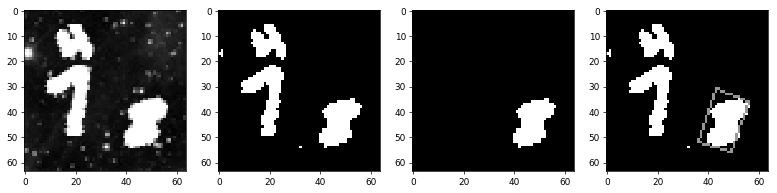

In [140]:
imageNum = 2501
# imageNum = 2504
xImgFiltTest = x_test.reshape(-1,64,64)
xImgOrgTest = x_originals.reshape(-1,64,64)

imageOrg = xImgOrgTest[imageNum].astype('uint8')
imageFilt = xImgFiltTest[imageNum].astype('uint8')
fig=plt.figure(figsize=(15,6), dpi=64)
a = fig.add_subplot(1,4,1)
plt.imshow(imageOrg, cmap='gray')
a = fig.add_subplot(1,4,2)
plt.imshow(imageFilt, cmap='gray')


ret, thresh = cv2.threshold(imageFilt,127,255,cv2.THRESH_BINARY)
contourImage, contours, hierarchy = cv2.findContours(thresh,1,2)
# print('Contours: \n', contours)
print('Hierarchy: \n', hierarchy)

cnt=contours[0]
# print('cnt', cnt)
largest_areas = sorted(contours, key=cv2.minAreaRect)
print(largest_areas)
# print(contours)
cnt=largest_areas[-1]

rect=cv2.minAreaRect(cnt)
print(rect)
box = cv2.boxPoints(rect)
# print('box', box)
box = np.int0(box)
# print('npbox', box)
mask = np.zeros(imageFilt.shape, np.uint8)
largestImage = cv2.drawContours(mask, [largest_areas[-1]], 0, (255,0,0,0), -1)

a = fig.add_subplot(1,4,3)
plt.imshow(largestImage, cmap='gray')

contoursImage = cv2.drawContours(imageFilt, [box], 0, (150,0,255),1)
a = fig.add_subplot(1,4,4)
plt.imshow(contoursImage, cmap='gray')








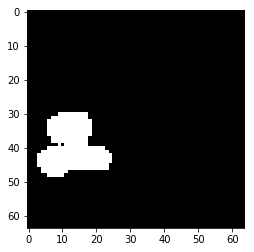

In [97]:
connectivity = 4  
imgOriginal = xImgFiltTest[imageNum].astype('uint0')
ret, thresh = cv2.threshold(imageOrg,127,255,cv2.THRESH_BINARY)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)

areas = list()
for k in range (0,stats.shape[0]):
    areas.append(stats[k,2]*stats[k,3])
    
max_label=1
max_size = areas[1]
for j in range(2, num_labels):
    if areas[j] > max_size:
        max_label = j
        max_size = areas[j]
preprocessed_img = np.zeros(labels.shape)
preprocessed_img[labels == max_label] = 255
plt.imshow(preprocessed_img, cmap='gray')

In [3]:
filteredX_test = x_test
filteredX_test[filteredX_test<240] = 0
xImgFiltTest = filteredX_test.reshape(-1, 64, 64)
new_dataset_test = []
for i,image in enumerate(xImgFiltTest):
    image = xImgFiltTest[i].astype('uint8')

    connectivity = 4  
    ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
    
    areas = list()
    for k in range (0,stats.shape[0]):
        areas.append(stats[k,2]*stats[k,3])
    max_label=1
    max_size = areas[1]
    for j in range(2, num_labels):
        if areas[j] > max_size:
            max_label = j
            max_size = areas[j]
    preprocessed_img = np.zeros(labels.shape)
    preprocessed_img[labels == max_label] = 255
    new_dataset_test.append(preprocessed_img)


In [4]:
filteredX_train = x_train
filteredX_train[filteredX_train<240] = 0
xImgFiltTrain = filteredX_train.reshape(-1, 64, 64)
new_dataset_train = []
for i,image in enumerate(xImgFiltTrain):
    image = xImgFiltTrain[i].astype('uint8')

    connectivity = 4  
    ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
    areas = list()
    for k in range (0,stats.shape[0]):
        areas.append(stats[k,2]*stats[k,3])
        
    max_label=1
    max_size = areas[1]
    for j in range(2, num_labels):
        if areas[j] > max_size:
            max_label = j
            max_size = areas[j]
    preprocessed_img = np.zeros(labels.shape)
    preprocessed_img[labels == max_label] = 255
    new_dataset_train.append(preprocessed_img)

(4096,)
(1, 64, 64)


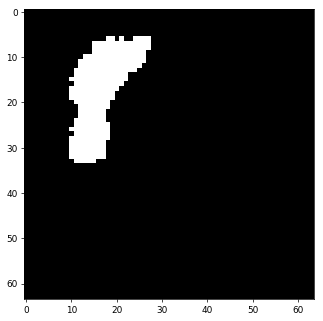

In [6]:
plt.figure(figsize=(15,6), dpi=64)
xImage = x_train[16000]
print(xImage.shape)
xImage = xImage.reshape(-1,64,64)
print(xImage.shape)
imgPlot = plt.imshow(xImage[0], cmap='gray')
imgPlot = plt.imshow(new_dataset_train[16000], cmap='gray')


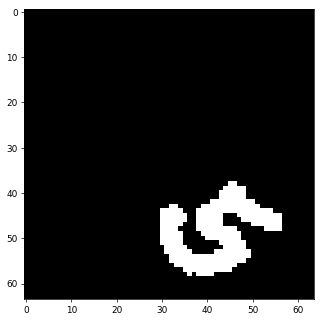

In [29]:
plt.figure(figsize=(15,6), dpi=64)
imgPlot = plt.imshow(new_dataset_train[49000], cmap='gray')

In [7]:
new_dataset_test = np.array(new_dataset_test)
print (new_dataset_test.shape)

new_dataset_train = np.array(new_dataset_train)
print (new_dataset_train.shape)

(10000, 64, 64)
(50000, 64, 64)


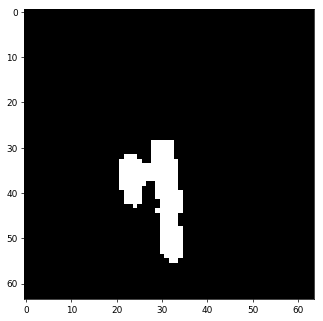

In [9]:
plt.figure(figsize=(15,6), dpi=64)
imgPlot = plt.imshow(new_dataset_test[8000], cmap='gray')
reshaped_test = np.reshape(new_dataset_test, (10000, 4096))
reshaped_train = np.reshape(new_dataset_train, (50000, 4096))

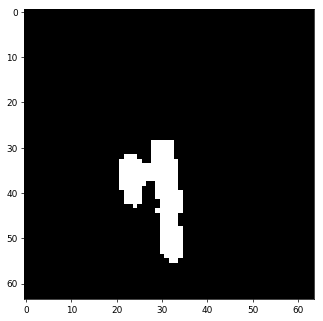

In [10]:
re_reshaped_test = reshaped_test.reshape(10000, 64, 64)
plt.figure(figsize=(15,6), dpi=64)
imgPlot = plt.imshow(re_reshaped_test[8000], cmap='gray')



In [11]:
pd.DataFrame(reshaped_test).to_csv(r'C:\Users\Owner\McGill\4thYear\COMP551\kaggle-MNIST\datasets\test_x_preproc.csv',
                                   header = False, sep=',', index = False)
pd.DataFrame(reshaped_train).to_csv(r'C:\Users\Owner\McGill\4thYear\COMP551\kaggle-MNIST\datasets\train_x_preproc.csv',
                                   header = False, sep=',', index = False)


In [39]:
x_train_preproc = np.loadtxt('datasets/train_x_preproc.csv', delimiter=',')


ValueError: cannot reshape array of size 204800000 into shape (10000,64,64)

<Figure size 960x384 with 0 Axes>

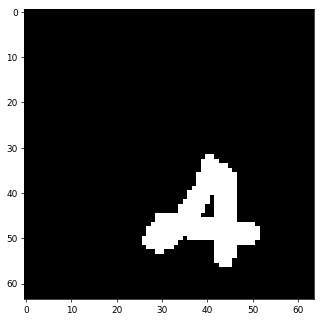

In [41]:
plt.figure(figsize=(15,6), dpi=64)
x_train_preproc = x_train_preproc.reshape(50000,64,64)
imgPlot = plt.imshow(x_train_preproc[10], cmap='gray')